In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from poliastro.bodies import Earth
from scipy.integrate import solve_ivp
plt.rcParams['font.family'] = 'Serif'

# Chapter 1: Dynamics of Point Masses

## 1.1 Introduction

This notebook covers the fundamental concepts of the dynamics of point masses, which is the foundation of orbital mechanics. We will explore kinematics, Newton's laws of motion and gravitation, and relative motion. Interactive code examples will help illustrate these concepts.

## 1.2 Kinematics

Kinematics is the branch of mechanics that describes the motion of objects without considering the forces that cause the motion. In this section, we will find the instantaneous centre and the radius of curvature of the path for a given instantaneous position vector $\vec r(t)$, velocity vector $\vec v(t)$ and the acceleration vector $\vec a(t)$.

We begin by finding the unit vector tangential to the path, given by
$$
    \hat u_t = \frac{\vec v}{v}; \ \ \ \text{where, } \ v = ||\vec v||
$$

The tangential acceleration $a_t$ is then given by $a_t = \vec a \cdot \hat u_t$. Using the relation $||\vec a||^2 = a_t^2 + a_n^2$, we get the normal component of the accelration as
$$
    a_n = \sqrt{||\vec a||^2 - a_t^2}
$$

Then, using the relation $\vec a = a_t\hat u_t + a_n\hat u_n$, we get the unit vector normal to the path and pointing towards the centre $\hat u_n$ as
$$
    \hat u_n = \frac{1}{a_n}(\vec a - a_t\hat u_t)
$$

Moreover, the radius of curvature $\varrho$ can be obtained from the normal acceleration $a_n$ using
$$
    \varrho = \frac{v^2}{a_n}
$$

Thus, we get the position of the centre of curvature $C$ with respect to the particle $P$ as $\vec r_{C/P} = \varrho\hat u_n$. From this, we can get the position of $C$ in the cartesian coordinate system as 
$$
    \vec r_C = \vec r + \vec r_{C/P}
$$

Once the centre and the radius are computed, the osculating circular path as a function of $\theta$ is given by
$$
    \vec r(\theta) = \vec r_C + \vec r_{P/C}(\theta)
$$

where, $\vec r_{P/C}(\theta) = \varrho\sin\theta\hat u_t - \varrho\cos\theta\hat u_n$. The normal to this osculating circle (binormal unit vector) $\hat u_b$ is then given by
$$
    \hat u_b = \hat u_t \times \hat u_n
$$

In [2]:
# Position vector
r = np.array([5, 5, 5])

# Velocity vector
v = np.array([0, 5, 0])

# Acceleration vector
a = np.array([-5/2, 0, -5/2])

vMag = np.linalg.norm(v)
uHat_t = v/vMag

a_t = np.dot(a, uHat_t)
aMag = np.linalg.norm(a)
a_n = np.sqrt(aMag**2 - a_t**2)

Rho = vMag**2/a_n
uHat_n = (a - a_t*uHat_t)/a_n

r_CP = Rho*uHat_n
r_C = r + r_CP

# Compute binormal unit vector
uHat_b = np.cross(uHat_t, uHat_n)
uHat_b = uHat_b / np.linalg.norm(uHat_b)  # Ensure unit vector

theta = np.linspace(0, 2*np.pi, 100)
r_PC = np.array([Rho*np.sin(theta)*uHat_t[0] - Rho*np.cos(theta)*uHat_n[0], 
                 Rho*np.sin(theta)*uHat_t[1] - Rho*np.cos(theta)*uHat_n[1],
                 Rho*np.sin(theta)*uHat_t[2] - Rho*np.cos(theta)*uHat_n[2]]).T
circle_x = r_C[0] + r_PC[:, 0]
circle_y = r_C[1] + r_PC[:, 1]
circle_z = r_C[2] + r_PC[:, 2]

### Visualization of Kinematic Vectors

In [3]:
# Create quiver plot data
# Vector r: from origin (0,0,0) to r
quiver_r = go.Cone(
    x=[r[0]], y=[r[1]], z=[r[2]],
    u=[r[0]], v=[r[1]], w=[r[2]],
    colorscale=[[0, 'blue'], [1, 'blue']],
    sizemode="absolute",
    sizeref=0.5,
    name='Position (r)',
    showscale=False
)

# Vector v: from r to r+v
quiver_v = go.Cone(
    x=[r[0] + v[0]], y=[r[1] + v[1]], z=[r[2] + v[2]],
    u=[v[0]], v=[v[1]], w=[v[2]],
    colorscale=[[0, 'red'], [1, 'red']],
    sizemode="absolute",
    sizeref=0.5,
    name='Velocity (v)',
    showscale=False
)

# Vector a: from r to r+a
quiver_a = go.Cone(
    x=[r[0] + a[0]], y=[r[1] + a[1]], z=[r[2] + a[2]],
    u=[a[0]], v=[a[1]], w=[a[2]],
    colorscale=[[0, 'green'], [1, 'green']],
    sizemode="absolute",
    sizeref=0.5,
    name='Acceleration (a)',
    showscale=False
)

quiver_c = go.Cone(
    x=[r_C[0]], y=[r_C[1]], z=[r_C[2]],
    u=[r_C[0]], v=[r_C[1]], w=[r_C[2]],
    colorscale=[[0, 'black'], [1, 'black']],
    sizemode="absolute",
    sizeref=0.5,
    name='Acceleration (a)',
    showscale=False
)

# Create lines to show vector paths
# Line for r: from origin to r
line_r = go.Scatter3d(
    x=[0, r[0]], y=[0, r[1]], z=[0, r[2]],
    mode='lines',
    line=dict(color='blue', width=4),
    name='r'
)

# Line for v: from r to r+v
line_v = go.Scatter3d(
    x=[r[0], r[0]+v[0]], y=[r[1], r[1]+v[1]], z=[r[2], r[2]+v[2]],
    mode='lines',
    line=dict(color='red', width=4),
    name='v'
)

# Line for a: from r to r+a
line_a = go.Scatter3d(
    x=[r[0], r[0]+a[0]], y=[r[1], r[1]+a[1]], z=[r[2], r[2]+a[2]],
    mode='lines',
    line=dict(color='green', width=4),
    name='a'
)

line_c = go.Scatter3d(
    x=[0, r_C[0]], y=[0, r_C[1]], z=[0, r_C[2]],
    mode='lines',
    line=dict(color='black', width=2),
    name='r_c'
)


circle = go.Scatter3d(
    x = circle_x, y = circle_y, z = circle_z,
    mode='lines',
    line=dict(color='black', width=4),
    name='Osculating Circle'
)

# Combine all traces
fig = go.Figure(data=[quiver_r, quiver_v, quiver_a, quiver_c, line_r, line_v, line_a, line_c, circle])

# Update layout for better visualization
fig.update_layout(
    title=f'Center = {r_C.round(2)}, Radius = {Rho.round(2)}',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    showlegend=True,
    width=800,
    height=800
)

## 1.3 Mass, Force, and Newton's Law of Gravitation

Newton's Law of Universal Gravitation states that every particle in the universe attracts every other particle with a force that is directly proportional to the product of their masses and inversely proportional to the square of the distance between their centers.
$$
    F_g = \frac{Gm_1m_2}{r^2}
$$

The weight $W$ of a small body with a mass $m$ much smaller than the Earth's mass $M$ is given by
$$
    W = \frac{GMm}{r^2} = mg
$$

where, 
$$
    g = \frac{GM}{r^2}
$$

For $r = R_E = 6378$ $km$, the value of the gravitational acceleration $g$ is given by $g_o = 9.807$ $m/s^2$. The general acceleration $g$ can be written in terms of $g_o$, $R_E$ and height from the surface $h$ by
$$
    g = g_o\frac{R_E^2}{(R_E + h)^2} = \frac{g_o}{(1 + h/R_E)^2}
$$


In [4]:
# Gravitational constant
G = 6.67430e-11  # m^3 kg^-1 s^-2

# Mass of two bodies
M = Earth.mass.value  # Mass of Earth in kg
R_E = Earth.R.value
g0 = G*M/R_E**2

h = np.linspace(0, 1000, 2000)
g = g0 / (1 + h*1000/R_E)**2

### Visualizing Gravitational Force vs. Distance

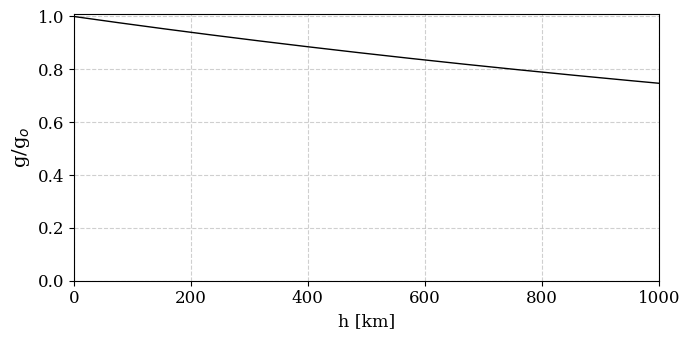

In [5]:
plt.figure(figsize=(7, 3.5))
plt.plot(h, g/g0, 'k', lw=1)
plt.xlabel('h [km]', size=12.5)
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('g/g$_o$', size=14)
plt.grid(ls='--', alpha=0.6)
plt.ylim(0, 1.01)
plt.xlim(0, 1000)
plt.tight_layout()

## 1.4 Newton's Law of Motion

Newton's Second Law of Motion states that the acceleration of an object is directly proportional to the net force acting on it and inversely proportional to its mass. In an inertial reference frame with a net force on a point mass $(\vec F_{\text{net}})$, the second law can be given as

$$
    \vec F_{\text{net}} = m\vec a
$$
where $\vec a$ is the absolute acceleration in the inertial frame of reference. 

The total impulse $\vec I$ due to this net force over a time period $\Delta t$ is given by,
$$
    \vec I = \int_{t_1}^{t_2}\vec F_{\text{net}}dt
$$
For a constant mass over the time duration $\Delta t$,
$$
    \vec I = m\int_{t_1}^{t_2}\frac{d\vec v}{dt}dt = m(\vec v_2 - \vec v_1) = m\Delta \vec v
$$

If the net force remains constant for the period $\Delta t$, $\vec I$ can be equated to $\vec F_{\text{net}}\Delta t$, giving
$$
    \vec F_{\text{net}} = m\frac{\Delta \vec v}{\Delta t}
$$

This $\vec F_{\text{net}}$ also induces a net moment about a point $O$ $(\vec M_{O\text{net}})$, given by
$$
    \vec M_{O\text{net}} = \vec r\times\vec F_{\text{net}} = \vec r\times m\vec a = \vec r\times m\frac{d\vec v}{dt}
$$

The last term in the above equation can be simplified as
$$
    \vec r\times m\frac{d\vec v}{dt} = \frac{d}{dt}(\vec r \times m\vec v) - \underbrace{\frac{d\vec r}{dt}\times m \vec v}_{\vec v\times \vec v = 0} = \frac{d\vec H_O}{dt}
$$
where $\vec H_O = \vec r \times m\vec v$ is the angular momentum about $O$.

Therefore, the Angular Impulse is given by
$$
    \int_{t_1}^{t_2}\vec M_{O\text{net}}dt = \vec H_{O_2} - \vec H_{O_1}
$$




In [6]:
import sympy as sp
sp.init_printing()

In [7]:
c, d, l, u, m = sp.symbols('c d l u m', real=True, positive=True)
vx, vy = sp.symbols('v_x v_y', real=True)


In [8]:
r0 = sp.Matrix([c, d, 0])
v0 = sp.Matrix([-u, 0, 0])

r1 = sp.Matrix([-sp.sqrt(l**2 - d**2), d, 0])
v1 = sp.Matrix([vx, vy, 0])

H0 = r0.cross(m*v0)
H1 = r1.cross(m*v1)

In [9]:
eq1 = sp.Eq(H0[2], H1[2])
eq2 = sp.Eq(r1.dot(v1), 0)

sol = sp.solve([eq1, eq2], [vx, vy], dict=True)[0]


In [10]:
v1_sub = v1.subs(sol)

In [11]:
sp.sqrt(sp.simplify(v1_sub.dot(v1_sub)))

In [12]:
I = m*(v1_sub - v0)
IMag = sp.sqrt(sp.simplify(I.dot(I)))

In [13]:
IMag

## 1.5 Time Derivatives of Moving Vectors

When dealing with rotating reference frames, the time derivative of a vector has additional terms to account for the rotation of the frame. This is crucial for understanding phenomena like the Coriolis and centrifugal forces. For a constant vector $\vec A$ rotating about an axis with an angular velocity $\vec \omega$ and an angular acceleration $\vec \alpha$, the time derivatives of the vector $\vec A$ is given by
$$
    \begin{align*}
        \frac{d\vec A}{dt} &= \vec \omega \times \vec A \\
        \frac{d^2\vec A}{dt^2} &= \vec \alpha \times \vec A + \omega \times (\omega \times \vec A) \\
        \frac{d^3\vec A}{dt^3} &= \frac{d\vec\alpha}{dt}\times \vec A + 2\vec\alpha\times(\vec\omega\times\vec A) + \vec\omega[\vec\alpha\times\vec A + \vec\omega\times(\vec\omega\times\vec A)]
    \end{align*}
$$

However, when the coordinate system itself rotates (non-inertial frame), Newton's laws are not directly applicable in such frames (body-axes, ECEF frames). Assuming a position vector $\vec r$ in a relative frame of reference rotating with an angular velocity $\vec \Omega$, the transport equation for the time derivative is given by
$$
    \left.\frac{d\vec r}{dt}\right|_{\text{I}} = \left.\frac{d\vec r}{dt}\right|_{\text{rel}} + \vec \Omega \times\vec r
$$

where $(...)_{\text{I}}$ is the derivative in the inertial frame and $(...)_{\text{rel}}$ is the derivative in the non-inertial (relative frame). To compute the acceleration of the position vector $\vec r$, we need to apply the same transport theorem to $\vec v_{\text{I}}$, thus
$$
    \left.\frac{d\vec v_{\text{I}}}{dt}\right|_{\text{I}} = \left.\frac{d\vec v_{\text{I}}}{dt}\right|_{\text{rel}} + \vec \Omega \times \vec v_{\text{I}}
$$
putting $\vec v_{\text{I}} = \vec v_{\text{rel}} + \vec\Omega\times\vec r$, we get

$$
    \left.\frac{d^2\vec r}{dt^2}\right|_{\text{I}} = \left.\frac{d^2\vec r}{dt^2}\right|_{\text{rel}} + \dot{\vec\Omega}\times\vec r + \left.2\vec\Omega\times\frac{d\vec r}{dt}\right|_{\text{rel}} + \vec\Omega\times(\vec\Omega\times\vec r)
$$

In [14]:
# Given parameters
Omega = np.array([0, 0, 1])
r0 = np.array([5, 0, 0])
vR0 = np.array([-5, 0, 0])  # Initial velocity in rotating frame (radial inward)

t_span = (0, 1)  # Time span
t_eval = np.linspace(0, 1, 500)  # Evaluation points

# --- Inertial Frame (analytical solution) ---
vI = vR0 + np.cross(Omega, r0)  # Constant: [5, 1, 0]
rI = r0 + np.outer(t_eval, vI)  # Broadcast to all times


# --- Rotating Frame (ODE definition) ---
def rotating_ode(t, y, Omega):
    r = y[:3]
    v = y[3:]
    coriolis = -2 * np.cross(Omega, v)
    centrifugal = -np.cross(Omega, np.cross(Omega, r))
    a = coriolis + centrifugal  # a_rel = 0, so only fictitious terms
    return np.concatenate((v, a))  # dy/dt = [dr/dt, dv/dt]

# Initial state [r_x, r_y, r_z, v_x, v_y, v_z]
y0 = np.concatenate((r0, vR0))

# Integrate with RK45 (higher-order, adaptive step)
sol = solve_ivp(rotating_ode, t_span, y0, args=(Omega,), method='RK45', t_eval=t_eval, rtol=1e-6, atol=1e-8)

# Extract results
rR = sol.y[:3].T  # Positions over time
vR = sol.y[3:].T  # Velocities over time (optional for plotting)


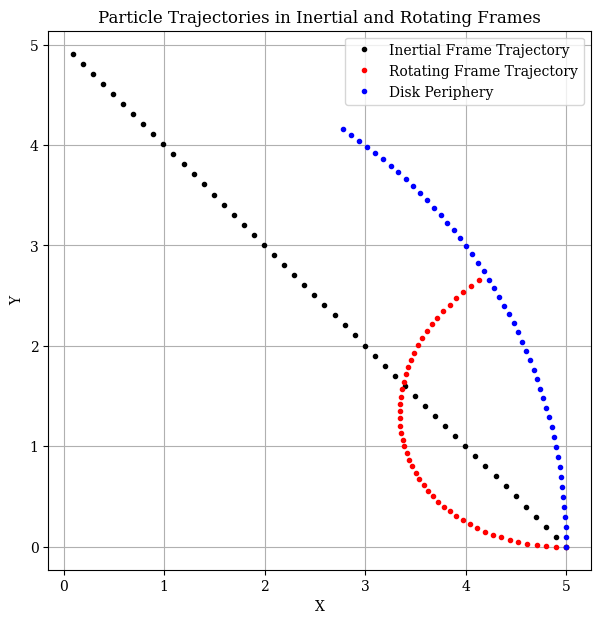

In [15]:
# Plotting
plt.figure(figsize=(7, 7))

# Inertial frame trajectory (straight line)
plt.plot(rI[::10, 0], rI[::10, 1], 'k.', lw=1, label='Inertial Frame Trajectory')

# Rotating frame trajectory (curved due to Coriolis)
plt.plot(rR[::10, 0], rR[::10, 1], 'r.', lw=1, label='Rotating Frame Trajectory')

# Disk periphery (for reference, assuming radius 5)
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(5*np.cos(t_eval[::10]), 5*np.sin(t_eval[::10]), 'b.', lw=1, label='Disk Periphery')

plt.axis('equal')  # Better than 'square' for aspect ratio
# plt.xlim([-6, 6])
# plt.ylim([-6, 6])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Particle Trajectories in Inertial and Rotating Frames')
plt.legend()
plt.grid(True)
# plt.show()  # Uncomment to display; here we assume it's for visualization

## 1.6 Relative Motion

The motion of an object as observed from another moving object is called relative motion. We can describe the position, velocity, and acceleration of a body relative to another using the transport equations.

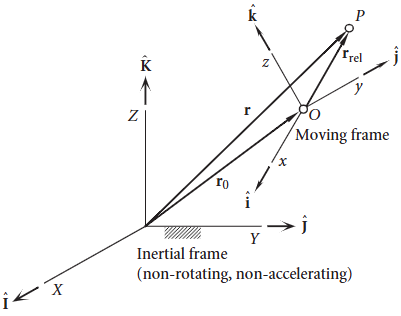